# Q3 Multi-layer CIFAR-10 Classifier

In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

In [2]:
transformations  = transforms.Compose([transforms.Grayscale(), transforms.ToTensor(),])
trainData = datasets.cifar.CIFAR10('./', train=True, download=True, transform=transformations)
testData = datasets.cifar.CIFAR10('./', train=False, download=True, transform=transformations)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
trainDataLoader = DataLoader(trainData, batch_size=64, shuffle=True)
testDataLoader = DataLoader(testData, batch_size=64, shuffle=False)

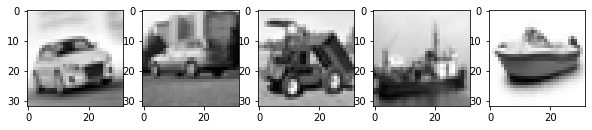

In [4]:
images, labels = iter(trainDataLoader).next()

plt.figure(figsize=(10, 6))
for index in np.arange(0, 5):
  plt.subplot(1, 5, index+1)
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)

In [5]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.input = torch.nn.Linear(32*32, 256)
    self.hidden1 = torch.nn.Linear(256, 128)
    self.hidden2 = torch.nn.Linear(128, 64)
    self.hidden3 = torch.nn.Linear(64, 32)
    self.output = torch.nn.Linear(32, 10)

  def forward(self, x):
    x = x.view(-1, 32*32)
    x = self.input(x)
    x = nn.functional.relu(x)
    x = self.hidden1(x)
    x = nn.functional.relu(x)
    x = self.hidden2(x)
    x = nn.functional.relu(x)
    x = self.hidden3(x)
    x = nn.functional.relu(x)
    x = self.output(x)
    x = nn.functional.relu(x)
    return x

  def fit(self, model, trainDataLoader, testDataLoader, epochs):
    Loss = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    train_loss_history = []
    test_loss_history = []

    for epoch in range(epochs):
      train_loss = 0.0
      test_loss = 0.0

      for _, data in enumerate(trainDataLoader):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        predicted_output = model(images)
        fit = Loss(predicted_output,labels)
        fit.backward()
        optimizer.step()
        train_loss += fit.item()

      for _, data in enumerate(testDataLoader):
        with torch.no_grad():
          images, labels = data
          images = images.cuda()
          labels = labels.cuda()
          predicted_output = model(images)
          fit = Loss(predicted_output,labels)
          test_loss += fit.item()

      train_loss = train_loss/len(trainDataLoader)
      test_loss = test_loss/len(testDataLoader)
      train_loss_history.append(train_loss)
      test_loss_history.append(test_loss)
      print('Epoch {}: Train loss = {}, Test loss = {}'.format(epoch+1, train_loss, test_loss))

    return train_loss_history, test_loss_history

  def evaluate(self, model, DataLoader):
    n_correct = 0
    predicted = []

    for data in DataLoader:
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()

      with torch.no_grad():
        outputs = model(images)
        (_, pred) = torch.max(outputs, 1)
        predicted.append(pred)
        n_correct += (pred == labels).sum().item()

    accuracy = ((n_correct * 1.0) / len(testData)) * 100
    return accuracy

In [6]:
epochs = 200
model = Network().cuda()
train_loss_history, test_loss_history = model.fit(model, trainDataLoader, testDataLoader, epochs)

Epoch 1: Train loss = 2.303232743307148, Test loss = 2.3022411158130427
Epoch 2: Train loss = 2.3016116844723595, Test loss = 2.300758779428567
Epoch 3: Train loss = 2.2995726257333975, Test loss = 2.2981403223268546
Epoch 4: Train loss = 2.2960529446296984, Test loss = 2.2932546381737775
Epoch 5: Train loss = 2.2884010009448548, Test loss = 2.2820969630198875
Epoch 6: Train loss = 2.2710373538839237, Test loss = 2.2580288595454707
Epoch 7: Train loss = 2.2473667558196864, Test loss = 2.2406747204482933
Epoch 8: Train loss = 2.235577408919859, Test loss = 2.230093869434041
Epoch 9: Train loss = 2.2283143405719184, Test loss = 2.2234085061747555
Epoch 10: Train loss = 2.221268266058334, Test loss = 2.216974926602309
Epoch 11: Train loss = 2.211322190511562, Test loss = 2.2048067241717297
Epoch 12: Train loss = 2.2015657321266504, Test loss = 2.196194624445241
Epoch 13: Train loss = 2.1949872633685237, Test loss = 2.198205472557408
Epoch 14: Train loss = 2.18931263151681, Test loss = 2.2

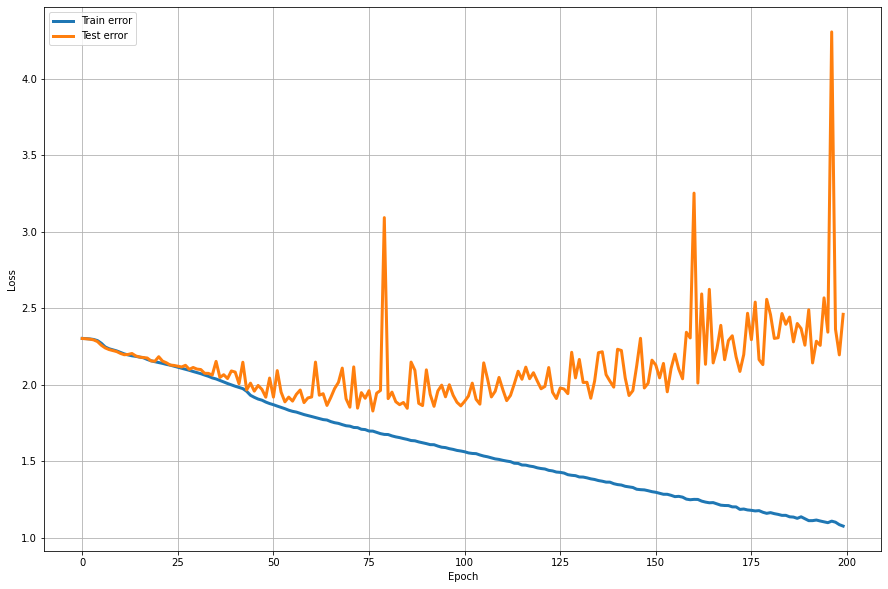

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(range(epochs), train_loss_history, '-', linewidth=3, label='Train error')
plt.plot(range(epochs), test_loss_history, '-', linewidth=3, label='Test error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.savefig('Error Plot.png')

In [8]:
accuracy = model.evaluate(model, testDataLoader)
print('Accuracy on Testing Data: ', accuracy)

Accuracy on Testing Data:  36.47


# End of Notebook